## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

---

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

---

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?

In [28]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm

In [2]:
data = pd.read_csv("amz_uk_price_prediction_dataset.csv")

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [3]:
data.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [4]:
crosstab = pd.crosstab(data["category"], data["isBestSeller"])
#crosstab["proportion"] = crosstab["True"] / crosstab["False"]
crosstab["proportion"] = crosstab[True] / crosstab[False]
cross_result = crosstab.sort_values("proportion", ascending=False)
cross_result.head(5)

isBestSeller,False,True,proportion
category,,,
Grocery,9008,556,0.061723
Smart Home Security & Lighting,98,6,0.061224
Health & Personal Care,9017,552,0.061218
Mobile Phone Accessories,248,11,0.044355
Power & Hand Tools,8353,306,0.036634


### Interpretation
the category "Grocery" seems to have the highest proportion of best sellers. this might be due to some basic needs of groceries. smart home security & lightning and health & personal care are two other categories with a similar high proportion of best sellers. all of these categories feature products which are needed regularly.

2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.


In [5]:
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(cross_result.head())
chi2_pvalue

1.2745587555081353e-11

In [6]:
cross_cramer = cross_result.copy()
cross_cramer = cross_cramer.drop(columns="proportion")
association(cross_cramer)

0.1222829439760564

### Interpretation
The null hypothesis of the Chi-square test is that the two categorical variables are independent. Given the extremely low \( p \)-value, we reject the null hypothesis. This implies that there is an association between `category` and `isBestSeller` in the dataset.  
the cramers value of 0.12 shows there is only a weak association between `category` and `isBestSeller`.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

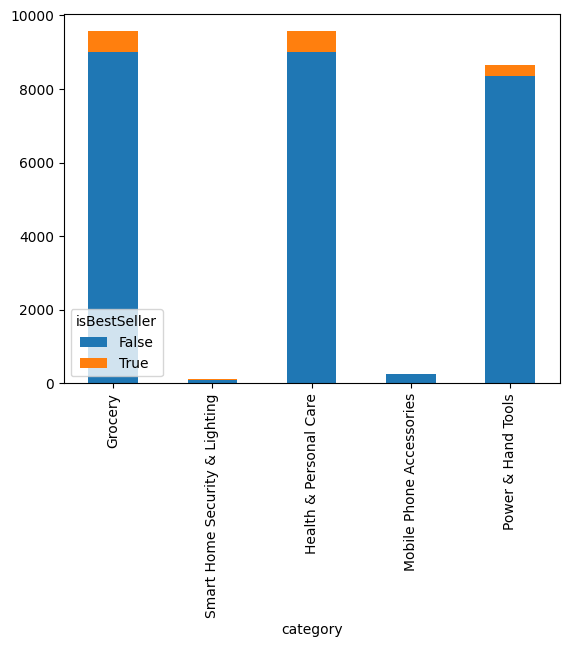

In [7]:
cross_result = cross_result.drop(columns="proportion")
cross_result.head().plot(kind="bar", stacked=True)

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

In [8]:
data2 = data.copy()
data2.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [9]:
def outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [10]:
outliers = outliers(data2["price"])
clean_df = data2.drop(outliers.index)
clean_df.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

In [11]:
cats = clean_df["category"].value_counts().head(20).index
top_df = clean_df[clean_df["category"].isin(cats)]

/var/folders/4d/kvxdy8f57vb9008_7qx5gx780000gn/T/ipykernel_22585/1049255285.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top_df, x="category", y="price", palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Handmade Home & Kitchen Products'),
  Text(1, 0, 'Sports & Outdoors'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Fragrances'),
  Text(4, 0, 'Skin Care'),
  Text(5, 0, 'Birthday Gifts'),
  Text(6, 0, 'Handmade Kitchen & Dining'),
  Text(7, 0, 'Bath & Body'),
  Text(8, 0, 'Manicure & Pedicure Products'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Handmade Artwork'),
  Text(11, 0, 'Make-up'),
  Text(12, 0, 'Baby'),
  Text(13, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(14, 0, 'Handmade Home Décor'),
  Text(15, 0, 'Men'),
  Text(16, 0, 'Luggage and travel gear'),
  Text(17, 0, 'Handmade Jewellery'),
  Text(18, 0, 'Women'),
  Text(19, 0, 'Hair Care')])

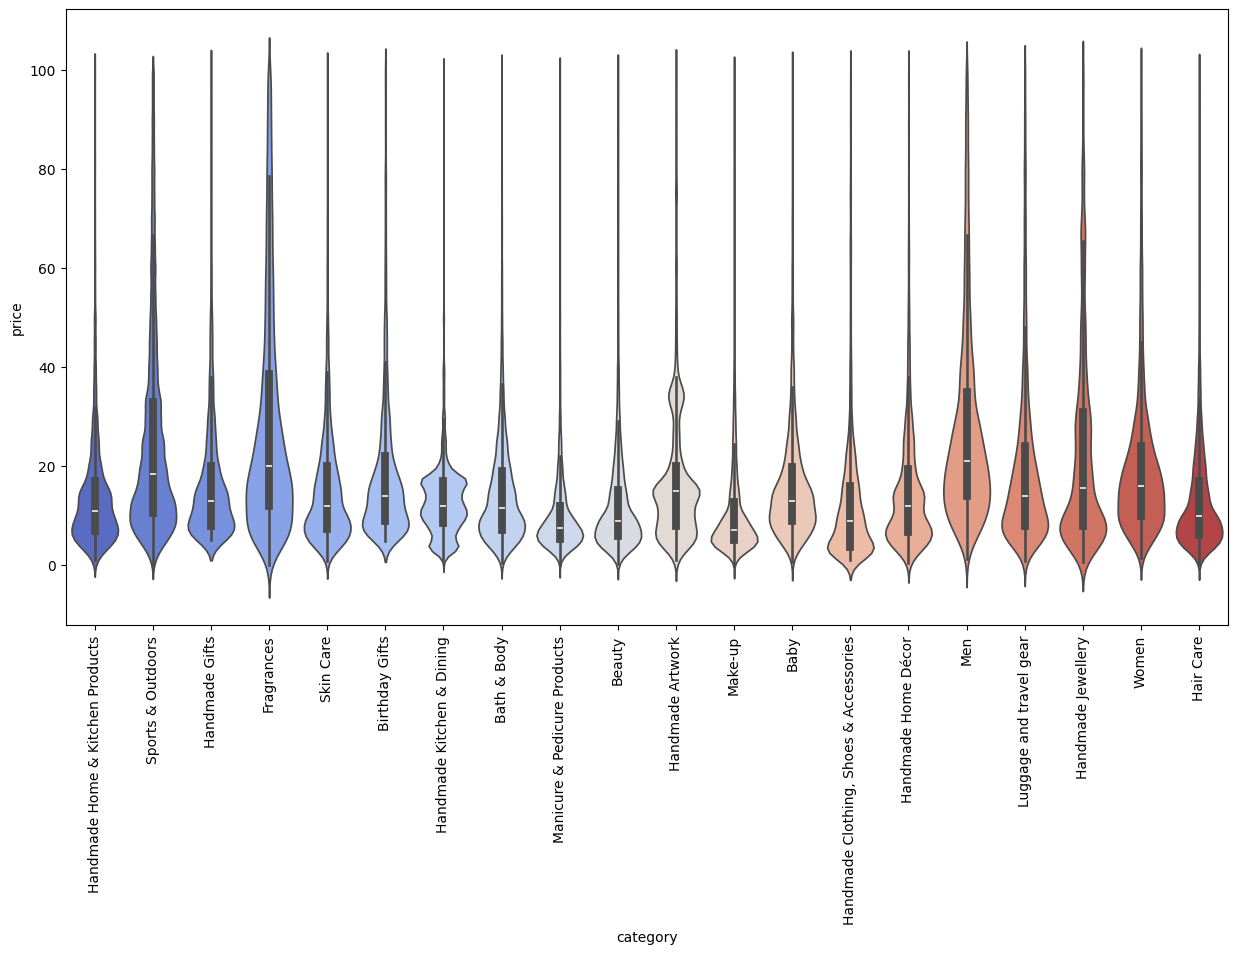

In [12]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=top_df, x="category", y="price", palette="coolwarm")
plt.xticks(rotation=90)

In [13]:
med_price = clean_df.groupby("category")["price"].median().sort_values(ascending=False)
med_price.head(10)

category
Desktop PCs               74.00
Boxing Shoes              69.79
Tablets                   69.00
Graphics Cards            68.54
Motherboards              67.92
Made in Italy Handmade    64.00
Digital Frames            63.90
Streaming Clients         62.68
Golf Shoes                62.39
Ski Helmets               61.33
Name: price, dtype: float64

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

In [14]:
top_ten = clean_df["category"].value_counts().head(10).index
ten_df = clean_df[clean_df["category"].isin(cats)]

In [15]:
mean_prices = clean_df[clean_df["category"].isin(top_ten)].groupby("category")["price"].median().sort_values(ascending=False)

/var/folders/4d/kvxdy8f57vb9008_7qx5gx780000gn/T/ipykernel_22585/1239941535.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


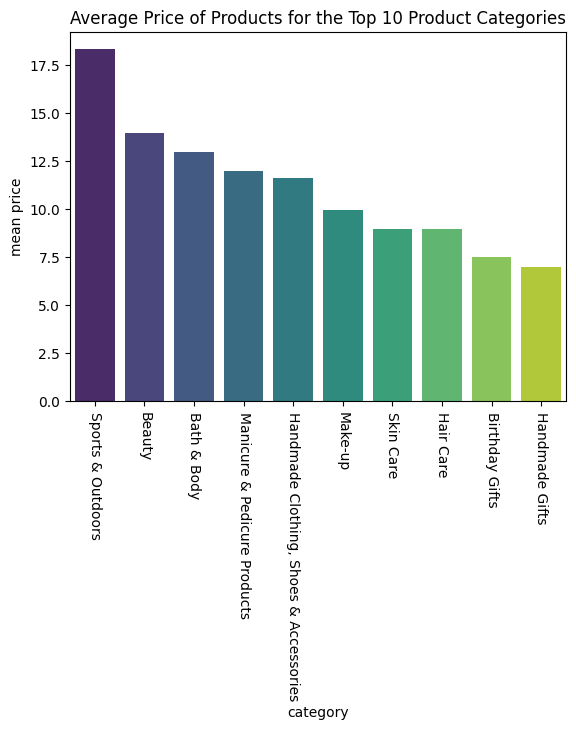

In [16]:
sns.barplot(
    x=top_ten,
    y=mean_prices,
    palette='viridis',
)
plt.xticks(rotation=270)
plt.title("Average Price of Products for the Top 10 Product Categories")
plt.ylabel("mean price")
plt.show()

In [17]:
mean_price = clean_df.groupby("category")["price"].mean().sort_values(ascending=False)
mean_price.head(10)


category
Motherboards         68.772432
Boxing Shoes         67.417803
Desktop PCs          66.915562
Tablets              66.552971
Graphics Cards       65.103509
Digital Frames       60.745129
Streaming Clients    60.241803
Hockey Shoes         60.094796
Computer Cases       58.339884
Skiing Poles         57.867770
Name: price, dtype: float64

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [18]:
cats = clean_df["category"].value_counts().head(10).index
top_df = clean_df[clean_df["category"].isin(cats)]

/var/folders/4d/kvxdy8f57vb9008_7qx5gx780000gn/T/ipykernel_22585/2579009974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_df, x="category", y="stars", palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Handmade Gifts'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

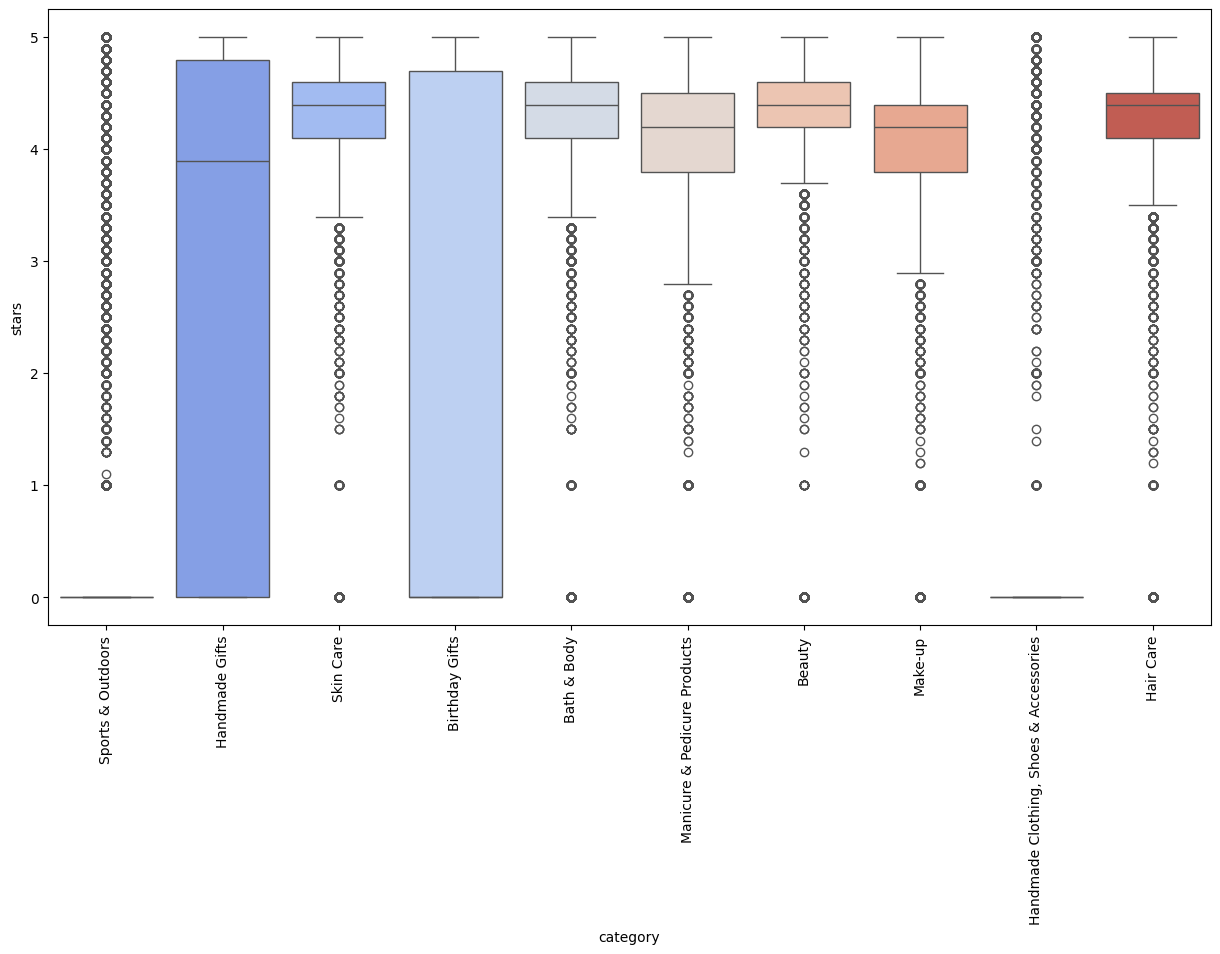

In [19]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=top_df, x="category", y="stars", palette="coolwarm")
plt.xticks(rotation=90)

In [20]:
med_rating = clean_df.groupby("category")["stars"].median().sort_values(ascending=False)
med_rating.head(10)

category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
Hobbies                         4.6
Beer, Wine & Spirits            4.6
Laptop Accessories              4.6
Cables & Accessories            4.5
CPUs                            4.5
Name: stars, dtype: float64

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?

In [21]:
clean_df["price"].corr(clean_df["stars"])

-0.07767299878181444

with a correlation coefficient of -0.08 there is no strong correlation between price and stars.

2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 


<Axes: xlabel='stars', ylabel='price'>

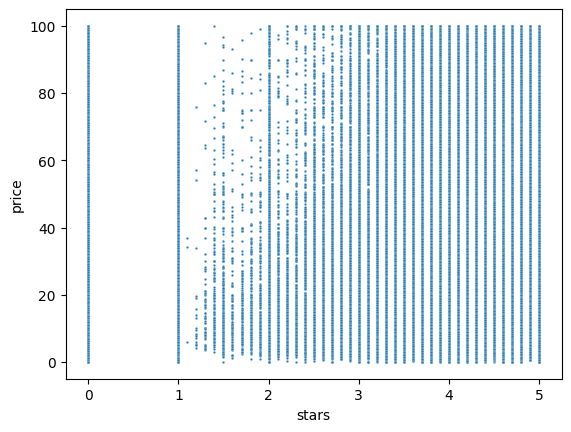

In [22]:
sns.scatterplot(data=clean_df, x="stars", y="price", s=3)

higher priced items seem to have less negative ratings.

In [23]:
num = clean_df.select_dtypes(include="number")

In [26]:
corr_matrix = num.corr()

Text(0.5, 1.0, 'Correlation Heatmap for Numerical Variables')

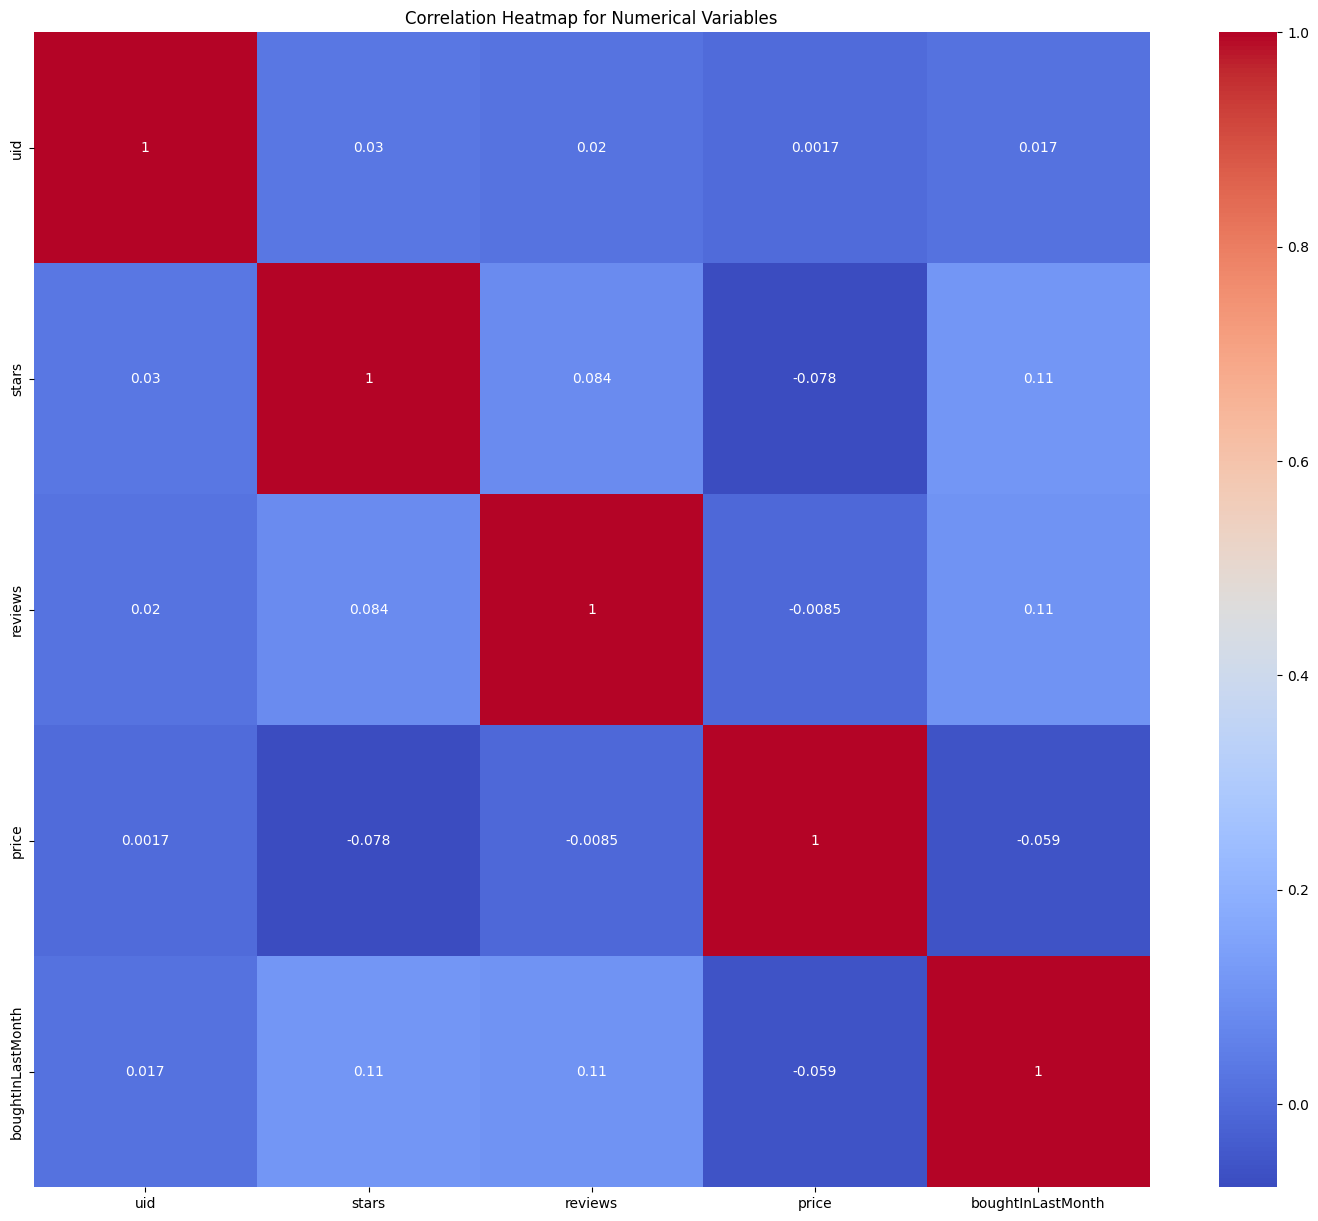

In [27]:
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Numerical Variables")

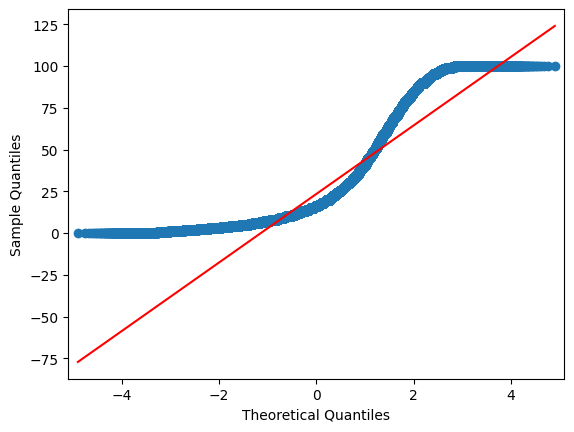

In [29]:
sm.qqplot(clean_df['price'], line='s');

<Axes: xlabel='price', ylabel='Count'>

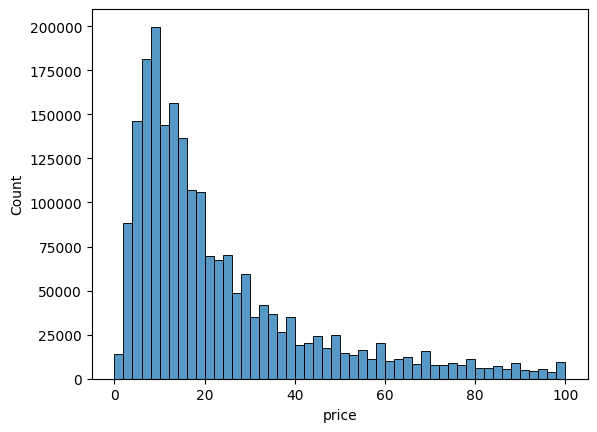

In [32]:
sns.histplot(clean_df['price'], bins=50)

not really normal distributed, its positively skewed

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?